# Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from pycaret.regression import *
import matplotlib
import warnings
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
font = {'size'   : 25,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]
from sklearn.metrics import r2_score

# Loading Data

In [25]:
paths = glob.glob(os.path.join("D:\Global_Petrophysics_ML\Training","*.csv"))
paths1 = glob.glob(os.path.join("D:\Global_Petrophysics_ML\Testing","*.csv"))
paths2 = paths+paths1

In [27]:
data=[]
for j,i in enumerate(paths2):
    r = pd.read_csv(i)
    r["well"]=j
    r["GR_max"] = r["GR"].max()
    r["GR_min"] = r["GR"].min()
    zzz=[]
    for k in r["Formation"].unique():
        a = r[(r["Formation"]==k)]
        m = a[(a["Clay Volume-Linear"]==a["Clay Volume-Linear"].max())]["Density Porosity"].values[0]
        if m<0:
            a["Shale Porosity"] = 0
        else:
            a["Shale Porosity"] = m
        zzz.append(a)
    r = pd.concat(zzz)
    data.append(r)

In [28]:
data[0]

,DEPTH,GR,BS,RHOB,RES,DT,Formation,CALI,Diff,CORRECT RHOB,...,Density Porosity,Sonic Porosity,Average Porosity,Clay Effect,Effective Porosity,SWind,well,GR_max,GR_min,Shale Porosity
0,3228.1367,83.1622,12.25,2.4676,10.6895,65.6560,Khadro Sand,16.5980,4.3480,2.445457,...,0.154704,0.163969,0.154704,0.069059,0.085645,0.130260,0,109.033,18.2729,0.1508
1,3228.2893,62.8111,12.25,2.4131,34.7267,58.9494,Khadro Sand,17.6836,5.4336,2.545751,...,0.096052,0.096063,0.096052,0.047400,0.048652,0.216696,0,109.033,18.2729,0.1508
2,3228.4417,45.5917,12.25,2.3753,81.9959,55.9626,Khadro Sand,18.3453,6.0953,2.597075,...,0.066038,0.007832,0.066038,0.029074,0.036964,0.277487,0,109.033,18.2729,0.1508
3,3228.5940,39.5101,12.25,2.3670,86.6740,55.0133,Khadro Sand,18.8337,6.5837,2.636651,...,0.042894,0.015791,0.042894,0.022602,0.020292,0.476039,0,109.033,18.2729,0.1508
4,3228.7463,37.4835,12.25,2.3690,88.1799,50.8921,Khadro Sand,19.0969,6.8469,2.629802,...,0.046899,0.013525,0.046899,0.020445,0.026454,0.374967,0,109.033,18.2729,0.1508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,3534.3083,42.6812,8.50,2.6122,641.7186,59.5001,Khadro Sand,12.3158,3.8158,2.541836,...,0.098342,0.059042,0.098342,0.025977,0.072365,0.151589,0,109.033,18.2729,0.1508
1967,3534.4607,41.9234,8.50,2.5491,600.4700,57.0124,Khadro Sand,12.5700,4.0700,2.613389,...,0.056498,-0.038673,0.056498,0.025170,0.031328,0.322039,0,109.033,18.2729,0.1508
1968,3534.6133,42.1994,8.50,2.4755,517.0781,57.8587,Khadro Sand,12.9420,4.4420,2.610709,...,0.058065,-0.035949,0.058065,0.025464,0.032601,0.310695,0,109.033,18.2729,0.1508
1969,3534.7656,41.1803,8.50,2.4193,431.9862,57.3064,Khadro Sand,13.0931,4.5931,2.617030,...,0.054368,-0.041461,0.054368,0.024379,0.029989,0.334946,0,109.033,18.2729,0.1508


# Training data

In [471]:
training = data[0]
testing = data[1]
testing 

,DEPTH,GR,RHOB,DT,Formation,RES,CORRECT RHOB,CORRECT DT,Clay Volume-Linear,Clay Volume-Larionov,...,Clay Volume-Blend,Density Porosity,Average Porosity,Clay Effect,Effective Porosity,SWind,well,GR_max,GR_min,Shale Porosity
0,3627.1201,68.564,2.867,70.167,Khadro Sand,0.577,2.867,74.682760,0.552801,0.380123,...,0.552801,-0.091813,-0.091813,0.044289,0.000000,1.000000,1,109.552,11.913,0.080117
1,3630.9299,82.398,2.550,82.836,Khadro Sand,0.340,2.550,85.155469,0.703737,0.545398,...,0.703737,0.093567,0.093567,0.056381,0.037186,0.275995,1,109.552,11.913,0.080117
2,3633.1399,76.492,2.573,83.548,Khadro Sand,0.505,2.573,87.395029,0.639300,0.470591,...,0.639300,0.080117,0.080117,0.051219,0.028898,0.346305,1,109.552,11.913,0.080117
3,3634.7400,71.660,2.522,70.309,Khadro Sand,0.847,2.522,81.235229,0.586580,0.414167,...,0.586580,0.109941,0.109941,0.046995,0.062946,0.171857,1,109.552,11.913,0.080117
4,3636.3401,47.400,2.778,70.765,Khadro Sand,1.903,2.778,67.840030,0.321892,0.185599,...,0.321892,-0.039766,-0.039766,0.025789,0.000000,1.000000,1,109.552,11.913,0.080117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,4216.0698,41.923,2.621,57.643,Pab Formation,10.213,2.621,57.389681,0.329306,0.190926,...,0.329306,0.052047,0.052047,0.032545,0.019501,0.493385,1,109.552,11.913,0.098830
252,4217.6699,32.908,2.681,54.413,Pab Formation,13.064,2.681,54.780869,0.230383,0.124170,...,0.230383,0.016959,0.016959,0.022769,0.000000,1.000000,1,109.552,11.913,0.098830
253,4218.2798,39.019,2.657,56.370,Pab Formation,30.468,2.657,56.412829,0.297440,0.168414,...,0.297440,0.030994,0.030994,0.029396,0.001598,1.000000,1,109.552,11.913,0.098830
254,4219.2700,50.408,2.706,58.864,Pab Formation,29.345,2.706,58.417049,0.422414,0.262697,...,0.422414,0.002339,0.002339,0.041747,0.000000,1.000000,1,109.552,11.913,0.098830


In [562]:
training[["GR","RHOB","DT","RES","GR_max","GR_min","Formation","well","Clay Volume-Linear","Density Porosity","Effective Porosity","SWind"]].corr()

,GR,RHOB,DT,RES,GR_max,GR_min,well,Clay Volume-Linear,Density Porosity,Effective Porosity,SWind
GR,1.000000,-0.344550,0.090599,-0.030115,NaN,NaN,NaN,1.000000,-0.007113,-0.238495,0.120960
RHOB,-0.344550,1.000000,-0.165342,0.023577,NaN,NaN,NaN,-0.344550,-0.084550,-0.002319,0.077356
DT,0.090599,-0.165342,1.000000,0.064695,NaN,NaN,NaN,0.090599,0.754923,0.712175,-0.559784
RES,-0.030115,0.023577,0.064695,1.000000,NaN,NaN,NaN,-0.030115,-0.033970,-0.026017,0.004461
GR_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
well,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clay Volume-Linear,1.000000,-0.344550,0.090599,-0.030115,NaN,NaN,NaN,1.000000,-0.007113,-0.238495,0.120960
Density Porosity,-0.007113,-0.084550,0.754923,-0.033970,NaN,NaN,NaN,-0.007113,1.000000,0.972816,-0.741161
Effective Porosity,-0.238495,-0.002319,0.712175,-0.026017,NaN,NaN,NaN,-0.238495,0.972816,1.000000,-0.747805


<AxesSubplot:>

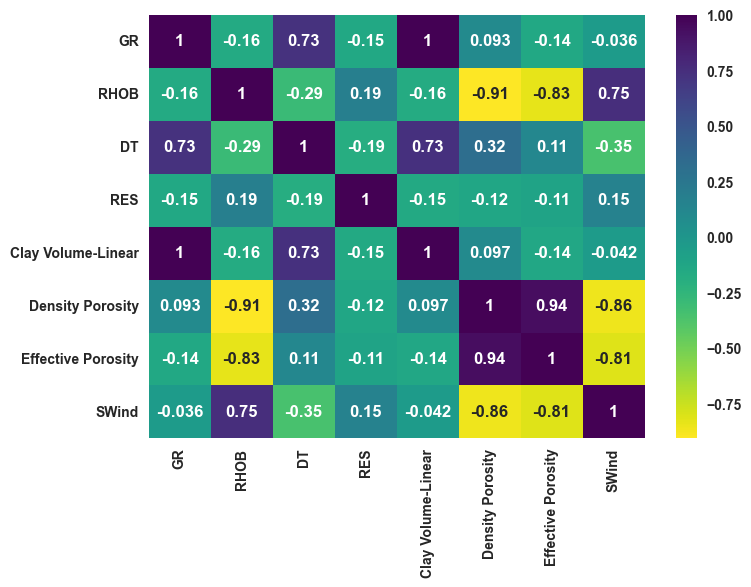

In [564]:
sns.heatmap(testing[["GR","RHOB","DT","RES","Clay Volume-Linear","Density Porosity","Effective Porosity","SWind"]].corr(),annot=True,cmap="viridis_r")

In [472]:
plt.figure(figsize=(10,8))
with sns.plotting_context(rc={'xtick.labelsize': 16.5,'ytick.labelsize': 16.5,'axes.labelsize':20}):
    sns.pairplot(data=training,vars=["CORRECT RHOB","CORRECT DT","GR","Clay Volume-Linear","Effective Porosity","SWind"],hue="well",palette=["red","green","yellow","blue"])

# Volume of Clay Prediction

In [473]:
features=training[["GR","well","Clay Volume-Linear","GR_max","GR_min","Formation"]].reset_index(drop=True)

In [474]:
reg = setup(data = features, target = 'Clay Volume-Linear',verbose=False,train_size=0.6)

In [475]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.4990
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.9090
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.8950
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.8370
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.8420
ridge,Ridge Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.8870
rf,Random Forest Regressor,0.0004,0.0000,0.0012,0.9999,0.0010,0.0013,1.9720
et,Extra Trees Regressor,0.0001,0.0000,0.0006,0.9999,0.0005,0.0003,1.8660
dt,Decision Tree Regressor,0.0005,0.0000,0.0013,0.9999,0.0010,0.0014,1.8310
gbr,Gradient Boosting Regressor,0.0013,0.0000,0.0021,0.9998,0.0016,0.0038,1.8280


Text(70.7222222222222, 0.5, 'Machine Learning Models')

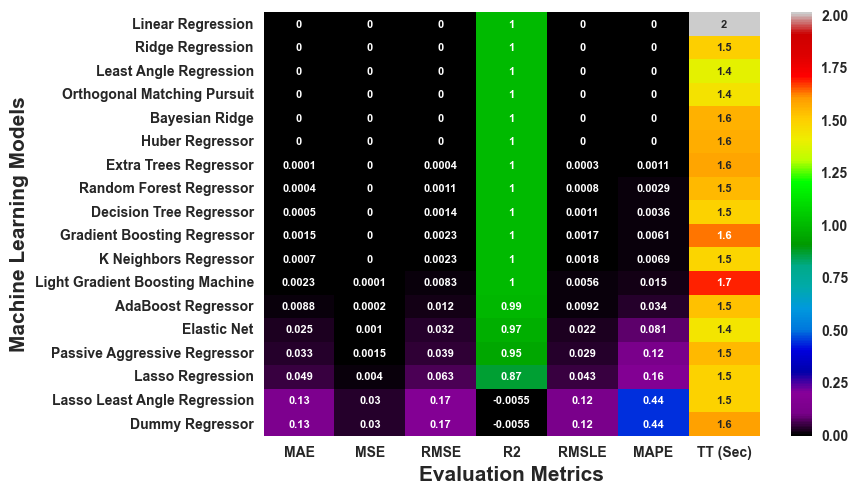

In [218]:
df = pull()
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [480]:
final_lightgbm = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0001,0.0000,0.0001,1.0000,0.0001,0.0002
1,0.0001,0.0000,0.0001,1.0000,0.0001,0.0002
2,0.0001,0.0000,0.0001,1.0000,0.0001,0.0001
3,0.0000,0.0000,0.0001,1.0000,0.0000,0.0001
4,0.0000,0.0000,0.0001,1.0000,0.0001,0.0001
5,0.0001,0.0000,0.0001,1.0000,0.0001,0.0003
6,0.0005,0.0000,0.0045,0.9991,0.0044,0.0009
7,0.0000,0.0000,0.0001,1.0000,0.0001,0.0002
8,0.0001,0.0000,0.0002,1.0000,0.0001,0.0002


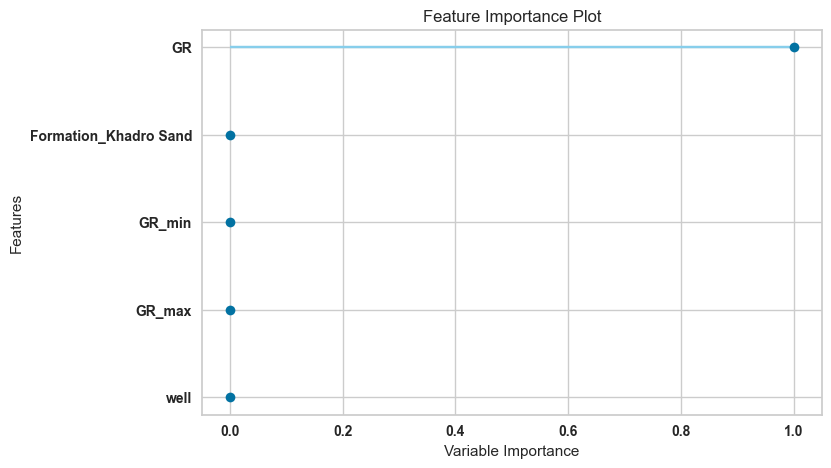

In [484]:
plot_model(final_lightgbm,plot='feature')


<AxesSubplot:ylabel='Fold'>

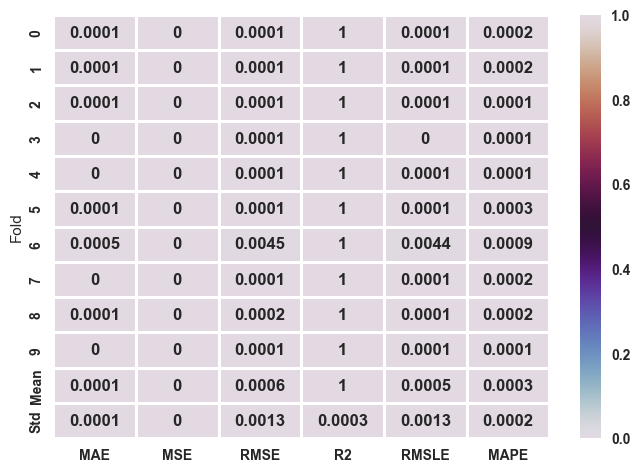

In [485]:

warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
font = {'size'   : 12,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]

df1 = pull()
sns.heatmap(df1,annot=True,linewidths=2,cmap="twilight")

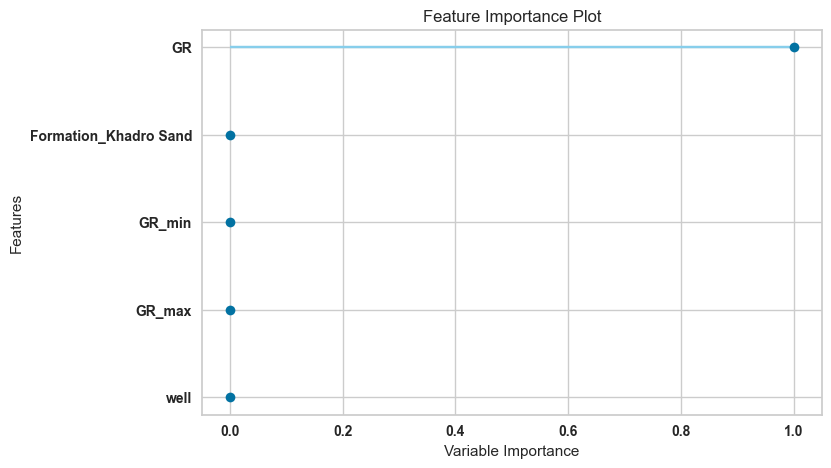

In [486]:
plot_model(final_lightgbm,plot='feature')

In [494]:

test = testing[["GR","well","GR_max","GR_min","Formation"]].reset_index(drop=True)
unseen_predictions = predict_model(final_lightgbm, data=test)
testing["Predicted Volume of Clay"] = unseen_predictions["prediction_label"]

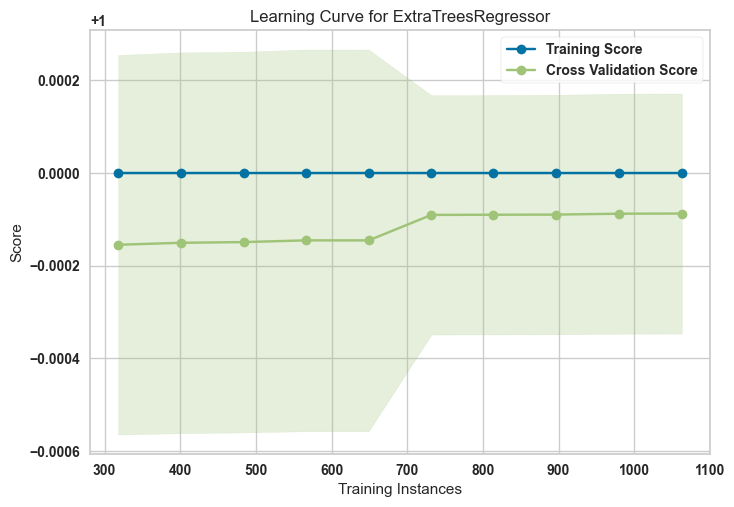

In [495]:
plot_model(final_lightgbm,plot='learning')

In [496]:
r2_score(testing["Predicted Volume of Clay"],testing["Clay Volume-Linear"])

0.9497537918296003

In [497]:
unseen_subset = reg.X_test_transformed
unseen_subset["Formation"] = reg.X_test_transformed["Formation_Khadro Sand"]
unseen_predictions_subset = predict_model(final_lightgbm, data=unseen_subset)
unseen_predictions_subset

,GR,well,GR_max,GR_min,Formation_Khadro Sand,Formation,prediction_label
939,41.461601,0.0,109.032997,18.2729,1.0,1.0,0.252065
934,38.333000,0.0,109.032997,18.2729,1.0,1.0,0.218111
657,50.929401,0.0,109.032997,18.2729,1.0,1.0,0.354981
1601,75.989098,0.0,109.032997,18.2729,1.0,1.0,0.627481
1765,70.806702,0.0,109.032997,18.2729,1.0,1.0,0.571125
...,...,...,...,...,...,...,...
1626,74.237503,0.0,109.032997,18.2729,1.0,1.0,0.608323
1748,62.414101,0.0,109.032997,18.2729,1.0,1.0,0.479759
132,59.444599,0.0,109.032997,18.2729,1.0,1.0,0.447594
27,87.409103,0.0,109.032997,18.2729,1.0,1.0,0.751595


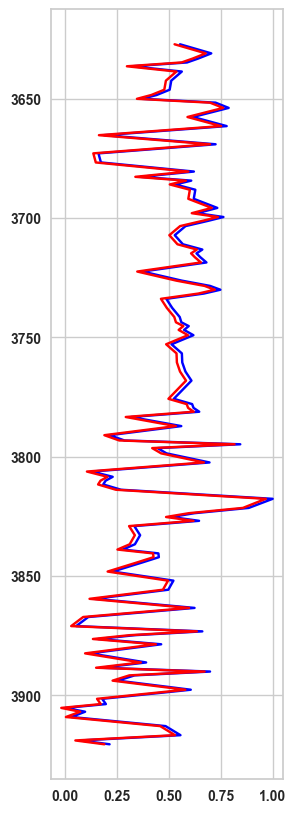

In [498]:
_1 = testing
_1 = _1[_1["Formation"]=="Khadro Sand"]
plt.figure(figsize=(3,10))

plt.plot(_1["Clay Volume-Linear"],_1["DEPTH"],label="Measured VCL",color="blue")
plt.plot(_1["Predicted Volume of Clay"],_1["DEPTH"],label="Predicted VCL",color="red")
plt.gca().invert_yaxis()
plt.show()

# Effective Porosity Prediction

In [505]:
features=training[["GR","well","Clay Volume-Linear","GR_max","GR_min","CORRECT RHOB","Density Porosity","Formation"]]

In [506]:
reg = setup(data = features, target = "Density Porosity",verbose=False,remove_outliers=True)

In [507]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.9560
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.9510
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.8710
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.9240
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.9910
dt,Decision Tree Regressor,0.0002,0.0000,0.0004,1.0000,0.0003,0.0017,2.0050
rf,Random Forest Regressor,0.0001,0.0000,0.0003,1.0000,0.0002,0.0013,2.0470
et,Extra Trees Regressor,0.0001,0.0000,0.0002,1.0000,0.0002,0.0007,2.2420
gbr,Gradient Boosting Regressor,0.0004,0.0000,0.0006,0.9999,0.0005,0.0034,2.0820
lightgbm,Light Gradient Boosting Machine,0.0005,0.0000,0.0010,0.9998,0.0009,0.0052,2.1160


Text(70.7222222222222, 0.5, 'Machine Learning Models')

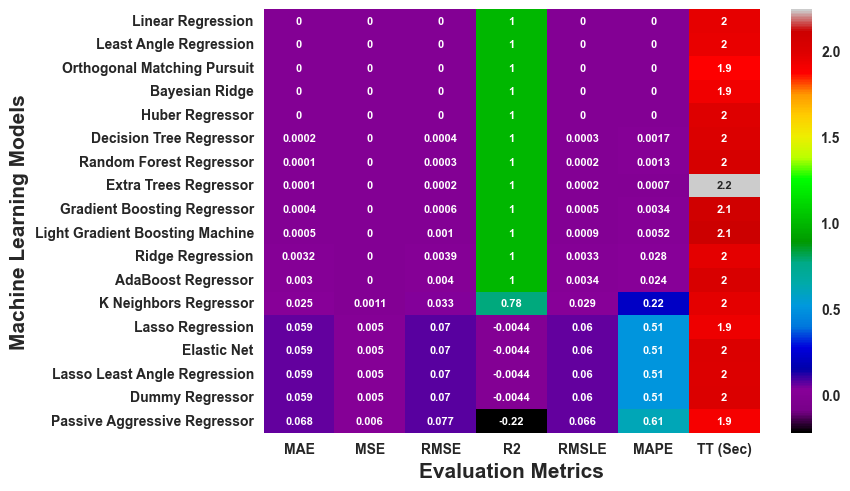

In [508]:
df = pull()
# cmap = ListedColormap(["lightskyblue"]*2)
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [510]:
testing["Measured VCL"] = testing["Clay Volume-Linear"].copy()
testing["Clay Volume-Linear"] = testing["Predicted Volume of Clay"]

In [319]:
final_lightgbm = finalize_model('lr')
test = testing[["GR","well","Clay Volume-Linear","GR_max","GR_min","CORRECT RHOB","Formation","Density Porosity"]]
unseen_predictions = predict_model(final_lightgbm, data=test)
testing["Density Porosity Predicted"] = unseen_predictions["prediction_label"]

In [320]:
r2_score(testing["Density Porosity Predicted"],testing["Density Porosity"])

0.7172377968064719

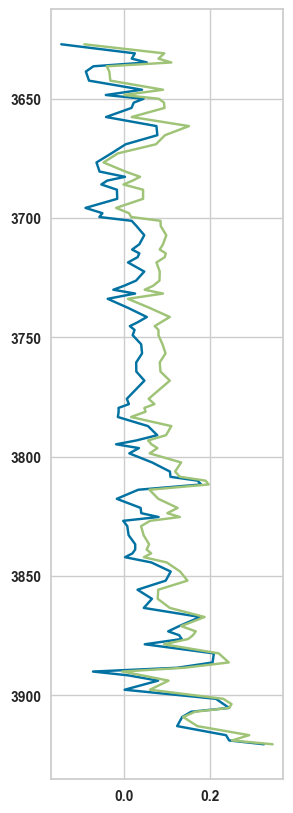

In [323]:
_1 = testing
_1 = _1[_1["Formation"]=="Khadro Sand"]
plt.figure(figsize=(3,10))
plt.plot(_1["Density Porosity Predicted"],_1["DEPTH"],label="Predicted Density Porosity")
plt.plot(_1["Density Porosity"],_1["DEPTH"],label="Measured Density Porosity")
plt.gca().invert_yaxis()
plt.show()

# Effective Porosity

In [514]:
features=training[["GR","GR_max","GR_min","CORRECT RHOB","well","Clay Volume-Linear","Density Porosity","Formation","Effective Porosity"]]

In [515]:
reg = setup(data = features, target = "Effective Porosity",verbose=False,remove_outliers=True)

In [516]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.8820
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.6850
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.7660
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.7410
et,Extra Trees Regressor,0.0010,0.0000,0.0025,0.9986,0.0023,0.0200,2.0240
ridge,Ridge Regression,0.0026,0.0000,0.0031,0.9981,0.0027,0.0400,1.7320
gbr,Gradient Boosting Regressor,0.0022,0.0000,0.0033,0.9978,0.0030,0.0371,1.7550
rf,Random Forest Regressor,0.0016,0.0000,0.0033,0.9977,0.0029,0.0299,1.7770
lightgbm,Light Gradient Boosting Machine,0.0019,0.0000,0.0035,0.9975,0.0031,0.0349,1.7060
dt,Decision Tree Regressor,0.0023,0.0000,0.0039,0.9968,0.0036,0.0392,1.7580


Text(70.7222222222222, 0.5, 'Machine Learning Models')

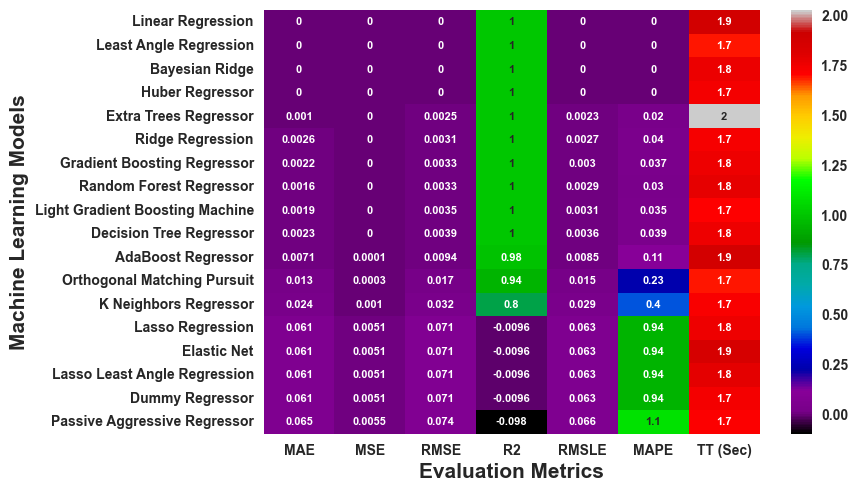

In [518]:
df = pull()
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [1]:
testing["Measured Density Porosity"] = testing["Density Porosity"].copy()
testing["Density Porosity"] = testing["Density Porosity Predicted"]

In [520]:
final_lightgbm = create_model("et")
test = testing[["GR","GR_max","GR_min","CORRECT RHOB","well","Clay Volume-Linear","Density Porosity","Formation"]]
unseen_predictions = predict_model(final_lightgbm, data=test)
testing["Predicted Effective Porosity"] = unseen_predictions["prediction_label"]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0007,0.0000,0.0014,0.9997,0.0012,0.0104
1,0.0008,0.0000,0.0022,0.9991,0.0020,0.0211
2,0.0007,0.0000,0.0013,0.9996,0.0011,0.0092
3,0.0012,0.0000,0.0031,0.9981,0.0029,0.0417
4,0.0013,0.0000,0.0037,0.9976,0.0033,0.0225
5,0.0013,0.0000,0.0039,0.9972,0.0033,0.0119
6,0.0012,0.0000,0.0033,0.9975,0.0030,0.0317
7,0.0008,0.0000,0.0019,0.9993,0.0017,0.0118
8,0.0008,0.0000,0.0017,0.9995,0.0015,0.0150


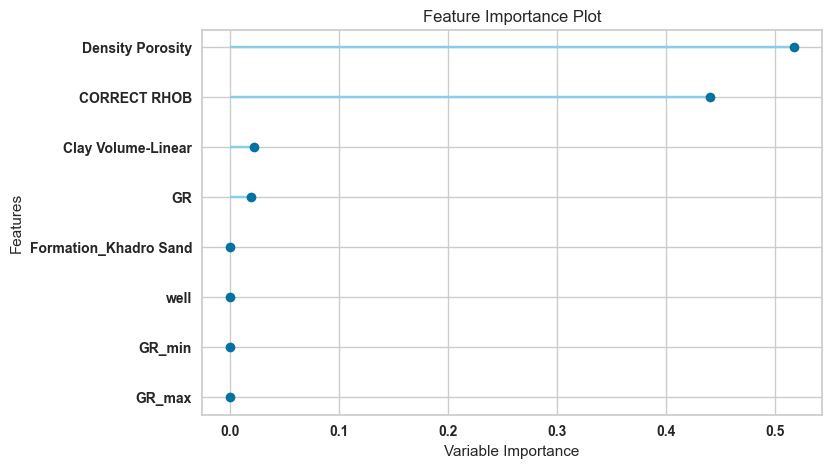

In [521]:
plot_model(final_lightgbm,plot='feature')

<AxesSubplot:ylabel='Fold'>

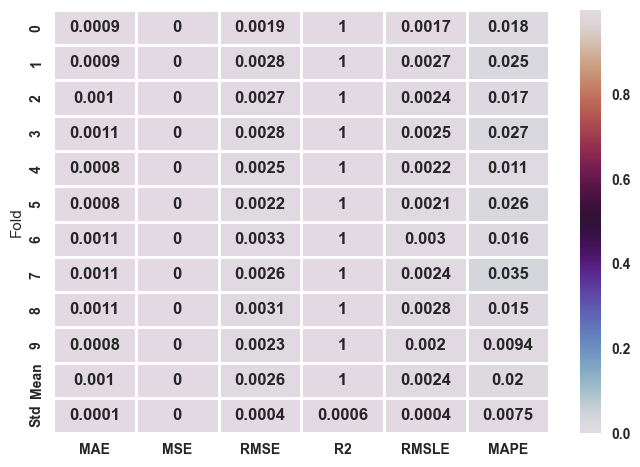

In [338]:

warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
font = {'size'   : 12,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]

df1 = pull()
sns.heatmap(df1,annot=True,linewidths=2,cmap="twilight")

In [342]:
r2_score(testing["Predicted Effective Porosity"],testing["Effective Porosity"])

0.517954765846997

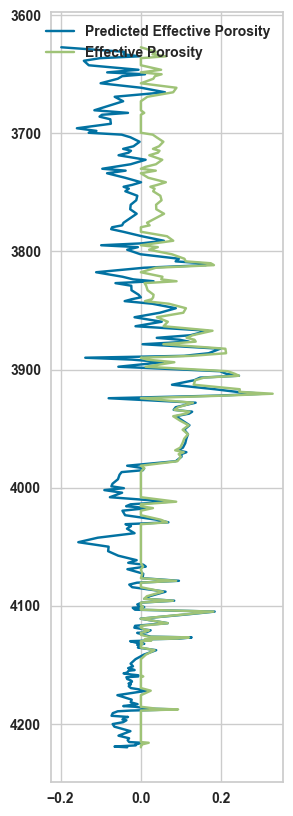

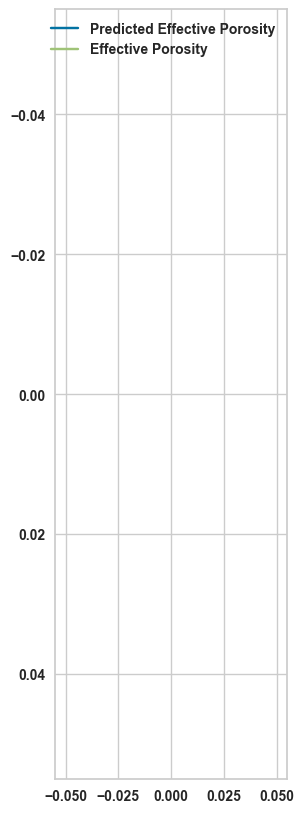

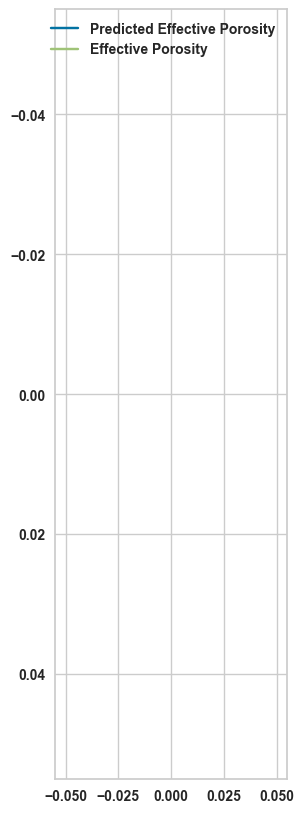

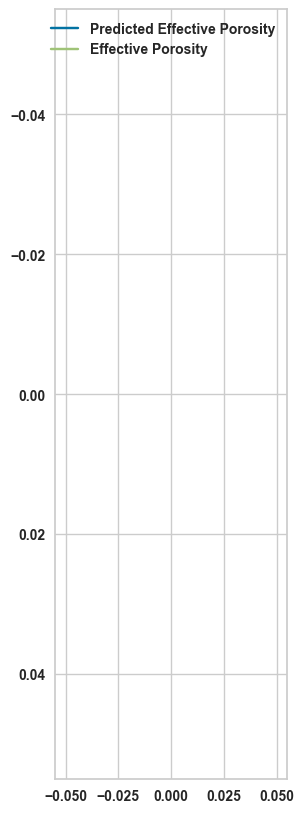

In [343]:
for j in [1,3,4,7]:
    _1 = testing[testing["well"]==j]
    plt.figure(figsize=(3,10))
    plt.plot(_1["Predicted Effective Porosity"],_1["DEPTH"],label="Predicted Effective Porosity")
    plt.plot(_1["Effective Porosity"],_1["DEPTH"],label="Effective Porosity")
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

# Water Saturation

In [525]:
features=training[["Clay Volume-Linear","SWind","Facies","Effective Porosity"]]

In [524]:
training = Facies_1D(training)

Name of facies column you want to create : Facies
Volume of shale column : Clay Volume-Linear
Water Saturation column : SWind


In [526]:
from pycaret.classification import *

In [ ]:
reg = setup(data = features, target = "SWind",verbose=False,remove_outliers=True)

In [344]:
features=training[["GR","well","Clay Volume-Linear","GR_max","GR_min","CORRECT RHOB","Effective Porosity","Formation","SWind"]]

In [527]:
reg = setup(data = features, target = "Facies",verbose=False,remove_outliers=True)

In [528]:
c2=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9993,0.9984,0.9993,0.9993,0.9993,0.9979,0.9980,1.6750
rf,Random Forest Classifier,0.9993,1.0000,0.9993,0.9993,0.9993,0.9979,0.9980,1.8110
ada,Ada Boost Classifier,0.9993,0.9984,0.9993,0.9993,0.9993,0.9979,0.9980,1.8090
gbc,Gradient Boosting Classifier,0.9964,0.9984,0.9964,0.9975,0.9967,0.9899,0.9901,1.8060
lightgbm,Light Gradient Boosting Machine,0.9913,1.0000,0.9913,0.9939,0.9921,0.9755,0.9762,1.9060
knn,K Neighbors Classifier,0.9840,0.9986,0.9840,0.9853,0.9841,0.9546,0.9556,1.7520
et,Extra Trees Classifier,0.9768,0.9975,0.9768,0.9773,0.9767,0.9335,0.9341,1.8380
svm,SVM - Linear Kernel,0.9594,0.0000,0.9594,0.9453,0.9510,0.8787,0.8822,1.7470
nb,Naive Bayes,0.9413,0.9837,0.9413,0.9356,0.9358,0.8219,0.8262,1.6710
lr,Logistic Regression,0.9333,0.9926,0.9333,0.9126,0.9214,0.7908,0.7991,2.3240


Text(70.7222222222222, 0.5, 'Machine Learning Models')

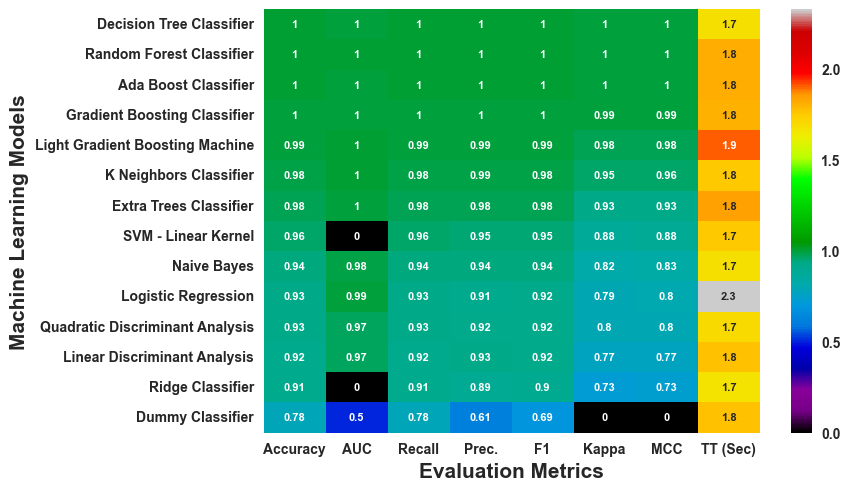

In [529]:
df = pull()
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [537]:
final_lightgbm = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9928,0.9839,0.9928,0.9928,0.9927,0.9795,0.9797
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


<AxesSubplot:ylabel='Fold'>

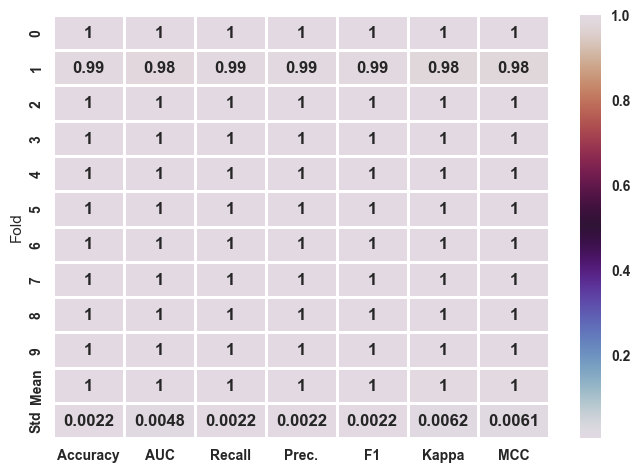

In [538]:
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
font = {'size'   : 12,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]

df1 = pull()
sns.heatmap(df1,annot=True,linewidths=2,cmap="twilight")

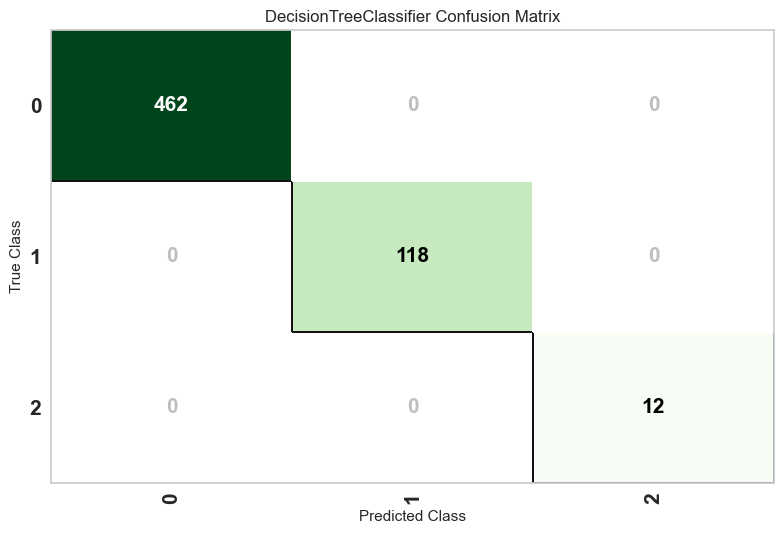

In [541]:
plot_model(final_lightgbm,plot='confusion_matrix')

In [348]:
testing["Measured Effective Porosity"] = testing["Effective Porosity"].copy()
testing["Effective Porosity"] = testing["Predicted Effective Porosity"]

In [355]:
final_lightgbm = create_model("et")
test = testing[["GR","well","Clay Volume-Linear","GR_max","GR_min","CORRECT RHOB","Effective Porosity","Formation"]]
unseen_predictions = predict_model(final_lightgbm, data=test)
testing["Predicted Water Saturation"] = unseen_predictions["prediction_label"]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0040,0.0009,0.0307,0.9518,0.0172,0.0058
1,0.0012,0.0001,0.0089,0.9954,0.0054,0.0027
2,0.0030,0.0007,0.0271,0.9630,0.0150,0.0046
3,0.0003,0.0000,0.0013,0.9998,0.0009,0.0013
4,0.0007,0.0000,0.0036,0.9990,0.0025,0.0025
5,0.0002,0.0000,0.0004,1.0000,0.0003,0.0011
6,0.0006,0.0000,0.0027,0.9994,0.0019,0.0018
7,0.0011,0.0000,0.0044,0.9988,0.0028,0.0030
8,0.0004,0.0000,0.0016,0.9997,0.0012,0.0021


<AxesSubplot:ylabel='Fold'>

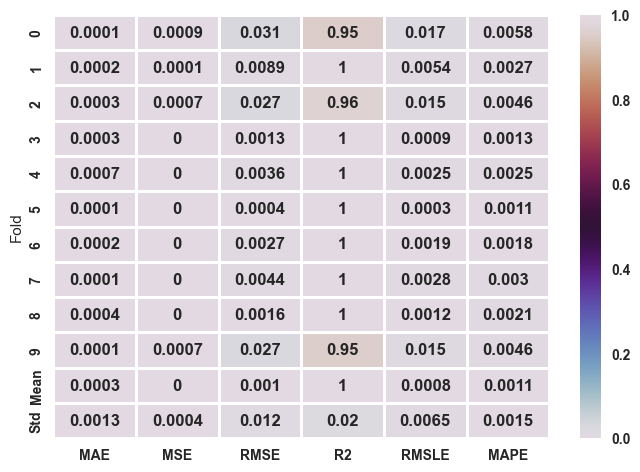

In [479]:
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
font = {'size'   : 12,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]
sns.heatmap(df1,annot=True,linewidths=2,cmap="twilight")

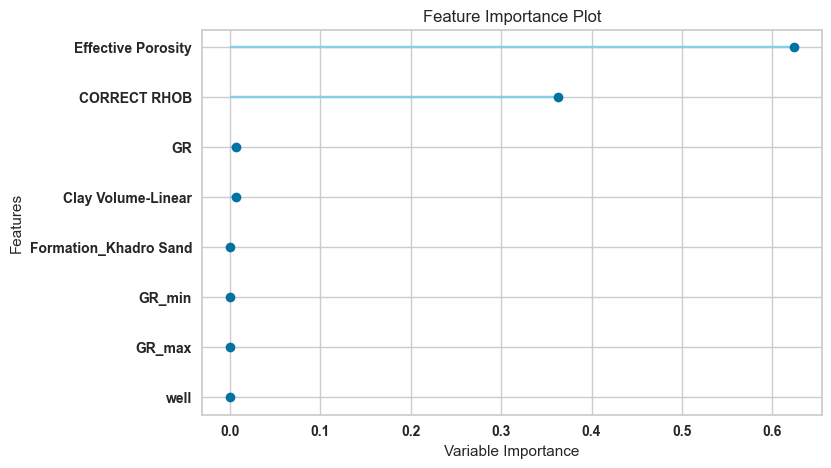

In [466]:
plot_model(final_lightgbm,plot='feature')

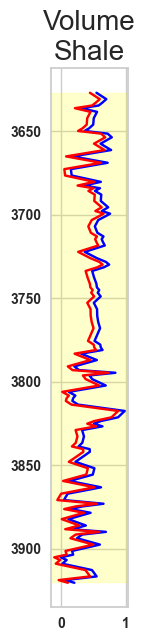

In [352]:

r = testing
r= r[r["Formation"]=="Khadro Sand"]
min1 = r[r["Formation"]=="Khadro Sand"]["DEPTH"].min()
min2 = r[r["Formation"]=="Khadro Sand"]["DEPTH"].max()


plt.figure(figsize=(1,7))
plt.plot(r["Measured VCL"],r["DEPTH"],color="blue")
plt.plot(r["Predicted Volume of Clay"]-0.1,r["DEPTH"],color="red")
plt.gca().invert_yaxis()

plt.axhspan(min1, min2,color="yellow",alpha=0.2)

plt.title("Volume\nShale",fontsize=20)
plt.show()

In [353]:
testing["Measured Water Saturation"] = testing["SWind"].copy()

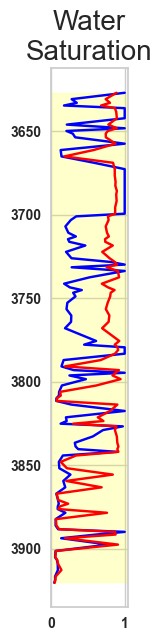

In [354]:
r = testing
r= r[r["Formation"]=="Khadro Sand"]

min1 = r[r["Formation"]=="Khadro Sand"]["DEPTH"].min()
min2 = r[r["Formation"]=="Khadro Sand"]["DEPTH"].max()

plt.figure(figsize=(1,7))


plt.plot(r["Measured Water Saturation"],r["DEPTH"],color="blue")
plt.plot(r["Predicted Water Saturation"],r["DEPTH"],color="red")
plt.gca().invert_yaxis()
plt.axhspan(min1, min2,color="yellow",alpha=0.2)
plt.title("Water\nSaturation",fontsize=20)
plt.show()

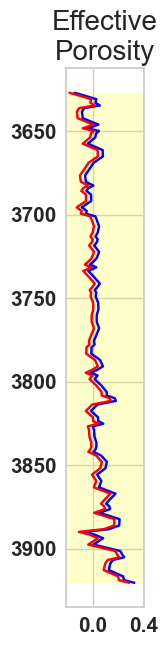

In [108]:
r = testing
r= r[r["Formation"]=="Khadro Sand"]


min1 = r[r["Formation"]=="Khadro Sand"]["DEPTH"].min()
min2 = r[r["Formation"]=="Khadro Sand"]["DEPTH"].max()

plt.figure(figsize=(1,7))

plt.plot(r["Measured Effective Porosity"],r["DEPTH"],label="Effective Porosity",color="blue")
plt.plot(r["Predicted Effective Porosity"]-0.02,r["DEPTH"],label="Predicted Effective Porosity",color="red")
plt.gca().invert_yaxis()
plt.axhspan(min1, min2,color="yellow",alpha=0.2)
plt.xticks([0,0.4])
plt.title("Effective\nPorosity",fontsize=20)
plt.show()

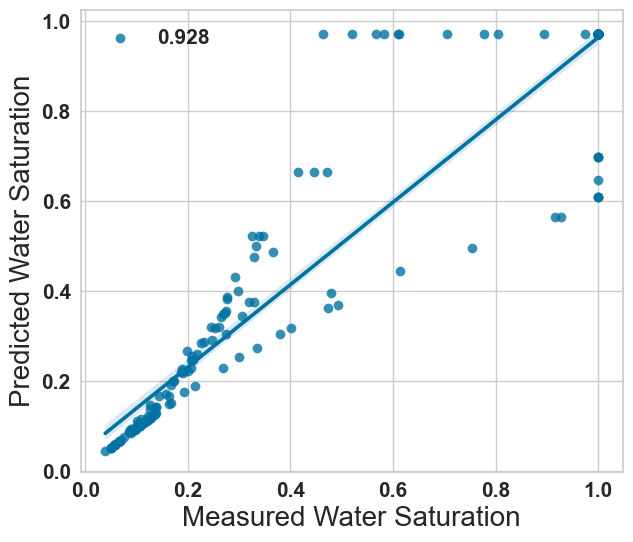

In [76]:
# for j in [2,3,6]:
#     _1 = testing[testing["well"]==j]

_1 = testing
plt.figure(figsize=(7,6))
score = r2_score(_1["Measured Water Saturation"],_1["Predicted Water Saturation"])
sns.regplot(data=_1, x = "Measured Water Saturation",y= "Predicted Water Saturation",label=f"{round(score,3)}")
plt.xlabel("Measured Water Saturation",fontsize=20)
plt.ylabel("Predicted Water Saturation",fontsize=20)
plt.legend(fontsize=15)
plt.show()

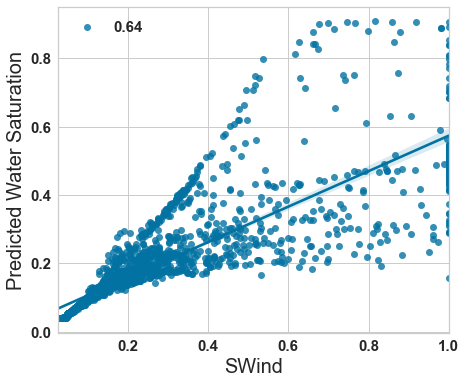

In [671]:
_1 = testing
plt.figure(figsize=(7,6))
score = r2_score(testing["SWind"],testing["Predicted Water Saturation"])
sns.regplot(_1["SWind"],_1["Predicted Water Saturation"],label=f"{round(score,2)}")
plt.xlabel("SWind",fontsize=20)
plt.ylabel("Predicted Water Saturation",fontsize=20)
plt.legend(fontsize=15)
plt.show()

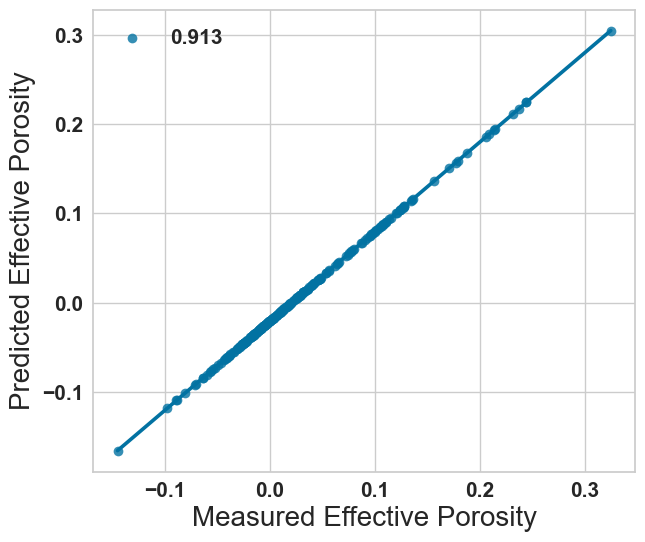

In [79]:
_11 = testing
plt.figure(figsize=(7,6))
_11["Predicted Effective Porosity"] = _11["Predicted Effective Porosity"]-0.02
score = r2_score(_11["Effective Porosity"],_11["Predicted Effective Porosity"])
sns.regplot(data=_11, x = "Measured Effective Porosity",y= "Predicted Effective Porosity",label=f"{round(score,3)}")
plt.xlabel("Measured Effective Porosity",fontsize=20)
plt.ylabel("Predicted Effective Porosity",fontsize=20)
plt.legend(fontsize=15)
plt.show()

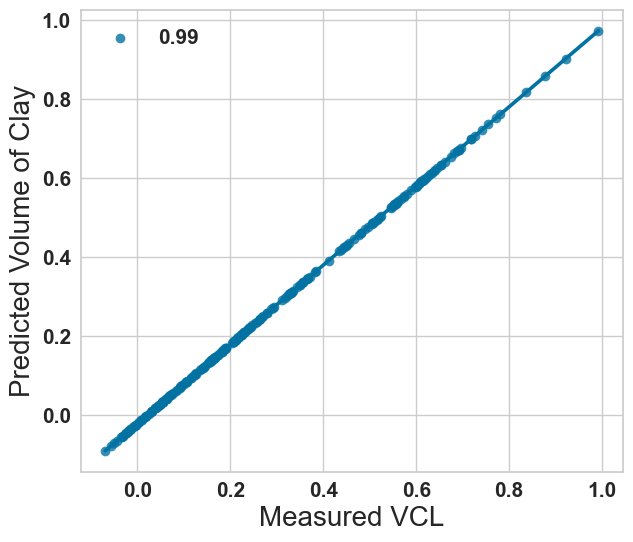

In [83]:
_11= testing
plt.figure(figsize=(7,6))
_11["Predicted Volume of Clay"] = _11["Predicted Volume of Clay"]-0.02
score = r2_score(_11["Predicted Volume of Clay"],_1["Measured VCL"])
sns.regplot(data=_11,x ="Measured VCL",y="Predicted Volume of Clay",label=f"{round(score,2)}")
plt.xlabel("Measured VCL",fontsize=20)
plt.ylabel("Predicted Volume of Clay",fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [486]:
testing

,DEPTH,GR,BS,RHOB,RES,DT,Formation,VCL,SW,NPHI,...,GR_min,Shale Porosity,CALI,Diff,PHIE,Predicted Volume of Clay,Measured VCL,Density Porosity Predicted,Measured Density Porosity,Predicted Effective Porosity
0,3393.5225,61.5145,8.5,2.534800,1.018505,102.316350,Khadro Sand,0.6814,1.0,35.159999,...,9.3602,0.129123,NaN,NaN,NaN,0.436286,0.569229,0.102456,0.102456,0.087427
1,3393.6748,61.8319,8.5,2.542300,1.077368,102.571658,Khadro Sand,0.6821,1.0,35.190001,...,9.3602,0.129123,NaN,NaN,NaN,0.441420,0.572810,0.098070,0.098070,0.082743
2,3393.8271,62.0807,8.5,2.541400,1.140444,102.248150,Khadro Sand,0.6749,1.0,34.750000,...,9.3602,0.129123,NaN,NaN,NaN,0.444646,0.575617,0.098596,0.098597,0.083286
3,3393.9797,62.2845,8.5,2.541200,1.221759,101.110872,Khadro Sand,0.6557,1.0,33.570001,...,9.3602,0.129123,NaN,NaN,NaN,0.449159,0.577917,0.098713,0.098713,0.083339
4,3394.1321,59.4045,8.5,2.552600,1.307448,99.890013,Khadro Sand,0.6384,1.0,32.609999,...,9.3602,0.129123,NaN,NaN,NaN,0.414204,0.545421,0.092047,0.092047,0.075839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,3541.8997,127.4371,8.5,2.614444,1.393406,95.384263,Khadro Sand,NaN,NaN,36.250001,...,23.7609,0.056875,8.368758,0.131242,0.0001,0.908797,0.907973,0.055881,0.055881,0.023457
94,3542.0520,127.7563,8.5,2.612743,1.353611,93.731367,Khadro Sand,NaN,NaN,36.629999,...,23.7609,0.056875,8.335288,0.164712,0.0001,0.908797,0.910769,0.056875,0.056875,0.025489
95,3544.3379,114.3728,8.5,2.700795,2.139880,93.423191,Khadro Sand,NaN,NaN,34.365099,...,23.7609,0.056875,8.205900,0.294100,0.0001,0.908797,0.793559,0.049466,0.049466,0.024571
96,3544.6428,110.2509,8.5,2.697598,1.961858,95.748209,Khadro Sand,NaN,NaN,34.329600,...,23.7609,0.056875,8.192267,0.307733,0.0001,0.908797,0.757460,0.048838,0.048838,0.024155


In [84]:
testing.to_csv("Final_testing11.csv",index=False)

# Loading Data

In [3]:
import sys
sys.path.append(r"D:\scripts")
from Facies import Facies_1D
from matplotlib.colors import ListedColormap

In [7]:
data = pd.read_csv("Final_testing11.csv")
data = testing
data.columns

In [606]:
data = Facies_1D(data)

Name of facies column you want to create : Facies
Volume of shale column : Measured VCL
Water Saturation column : SWind


In [2]:
# data = Facies_1D(data)  

In [607]:
data["Predicted Facies"].value_counts()

0    82
1    24
2     2
Name: Predicted Facies, dtype: int64

In [608]:
data["Facies"].value_counts()

0    82
1    24
2     2
Name: Facies, dtype: int64

In [609]:
colors = ListedColormap(["Green","Red","Blue"])

In [610]:
from sklearn.metrics import confusion_matrix

In [611]:
import matplotlib
import warnings
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
font = {'size'   : 12,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]

Text(0.5, 1.0, 'DecisionTreeClassifier Confusion Matrix')

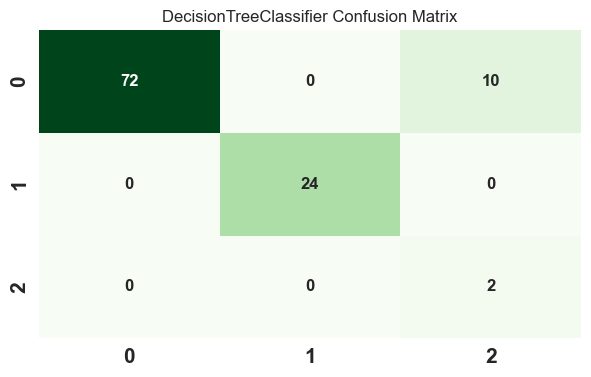

In [650]:
plt.figure(figsize=(7,4))
sns.heatmap(ff1,cmap="Greens",annot=True,cbar=False,linecolor='black')
plt.title("DecisionTreeClassifier Confusion Matrix")

In [11]:
CM = ff1

array([[72,  0, 10],
       [ 0, 24,  0],
       [ 0,  0,  2]])

In [19]:
TP = 72
TN = 24
FP = 10
FN = 0

In [20]:
PR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC

0.9056603773584906

In [21]:
PRE = TP/(TP+FP)
PRE

0.8780487804878049

In [22]:
RECALL = TP/(TP+FN)
RECALL

1.0

In [23]:
F1 = 2*(PRE*RECALL)/(PRE+RECALL)
F1

0.9350649350649352

In [633]:
data = data[data["Formation"]=="Khadro Sand"]
data

,DEPTH,GR,RHOB,DT,Formation,RES,CORRECT RHOB,CORRECT DT,Clay Volume-Linear,Clay Volume-Larionov,...,well,GR_max,GR_min,Shale Porosity,Predicted Volume of Clay,Measured VCL,Measured Density Porosity,Predicted Effective Porosity,Facies,Predicted Facies
0,3627.1201,68.564,2.867,70.167,Khadro Sand,0.577,2.867,74.682760,0.546685,0.380123,...,1,109.552,11.913,0.080117,0.546685,0.552801,-0.091813,0.016379,0,0
1,3630.9299,82.398,2.550,82.836,Khadro Sand,0.340,2.550,85.155469,0.697147,0.545398,...,1,109.552,11.913,0.080117,0.697147,0.703737,0.093567,0.029953,0,0
2,3633.1399,76.492,2.573,83.548,Khadro Sand,0.505,2.573,87.395029,0.633029,0.470591,...,1,109.552,11.913,0.080117,0.633029,0.639300,0.080117,0.025439,0,0
3,3634.7400,71.660,2.522,70.309,Khadro Sand,0.847,2.522,81.235229,0.580412,0.414167,...,1,109.552,11.913,0.080117,0.580412,0.586580,0.109941,0.053274,0,0
4,3636.3401,47.400,2.778,70.765,Khadro Sand,1.903,2.778,67.840030,0.316667,0.185599,...,1,109.552,11.913,0.080117,0.316667,0.321892,-0.039766,0.016485,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,3909.0601,20.504,2.475,60.423,Khadro Sand,2.151,2.475,62.570810,0.022384,0.013272,...,1,109.552,11.913,0.080117,0.022384,0.028444,0.137427,0.120060,1,1
104,3912.8701,62.169,2.419,77.754,Khadro Sand,0.421,2.419,76.559049,0.477225,0.314653,...,1,109.552,11.913,0.080117,0.477225,0.483029,0.170175,0.123698,0,0
105,3916.6799,68.779,2.213,64.827,Khadro Sand,1.926,2.213,74.358672,0.548962,0.382436,...,1,109.552,11.913,0.080117,0.548962,0.555147,0.290643,0.247932,0,0
106,3918.8899,24.541,2.281,59.993,Khadro Sand,0.940,2.281,60.734170,0.067962,0.034886,...,1,109.552,11.913,0.080117,0.067962,0.072489,0.250877,0.215847,1,1


In [579]:
import matplotlib
import warnings
warnings.filterwarnings("ignore")
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
font = {'size'   : 25,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]

[]

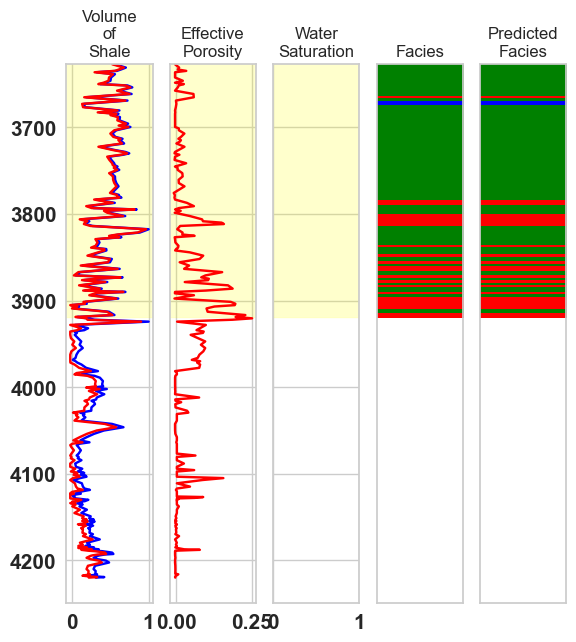

In [613]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(10,7),sharey=True)
fig.subplots_adjust(0.4)
ax[0].plot(r["Measured VCL"],r["DEPTH"],label="Measured VCL",color="blue")
ax[0].plot(r["Predicted Volume of Clay"]-0.02,r["DEPTH"],label="Predicted Volume of Clay",color="red")


# ax[1].plot(r["Measured Effective Porosity"],r["DEPTH"],label="Effective Porosity",color="blue")
ax[1].plot(r["Predicted Effective Porosity"]-0.02,r["DEPTH"],label="Predicted Effective Porosity",color="red")

# ax[2].plot(r["Measured Water Saturation"],r["DEPTH"],label="Water Saturation",color="blue")
# ax[2].plot(r["Predicted Water Saturation"]-0.02,r["DEPTH"],label="Predicted Water Saturation",color="red")
ax[3].imshow(pd.concat([data["Facies"]]*100,axis=1),aspect="auto",cmap=colors,extent=[0,100,data["DEPTH"].max(),data["DEPTH"].min()],interpolation="none")
ax[3].grid(False)
zz = ax[4].imshow(pd.concat([data["Predicted Facies"]]*100,axis=1),aspect="auto",cmap=colors,extent=[0,100,data["DEPTH"].max(),data["DEPTH"].min()],interpolation="none")

plt.grid(False)
ax[0].axhspan(min1, min2,color="yellow",alpha=0.2)
ax[1].axhspan(min1, min2,color="yellow",alpha=0.2)
ax[2].axhspan(min1, min2,color="yellow",alpha=0.2)

ax[0].set_title("Volume\nof\nShale",fontsize=12)
ax[1].set_title("Effective\nPorosity",fontsize=12)
ax[2].set_title("Water\nSaturation",fontsize=12)
ax[3].set_title("Facies",fontsize=12)
ax[4].set_title("Predicted\nFacies",fontsize=12)
ax[4].set_xticks([])
ax[3].set_xticks([])

In [150]:
data["VSHL"]=data["Measured VCL"]
data["PHIE"] = data["Measured Effective Porosity"]
data["SW"] = data["Measured Water Saturation"]

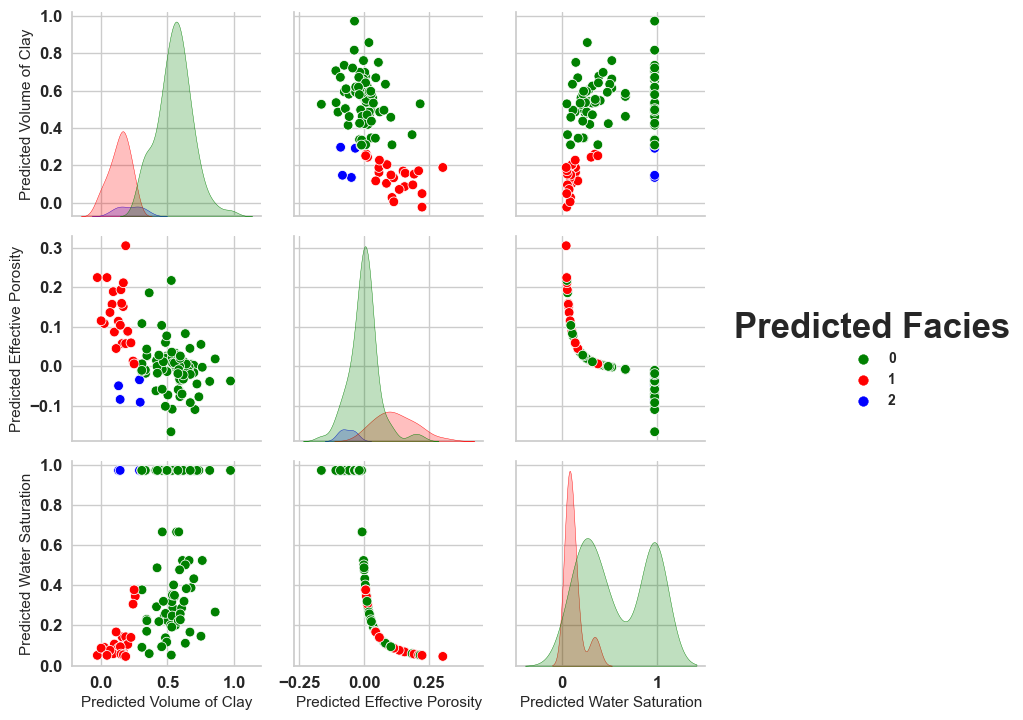

In [153]:
sns.pairplot(data=data,vars=["Predicted Volume of Clay","Predicted Effective Porosity","Predicted Water Saturation"],hue="Predicted Facies",palette=["Green","Red","Blue"])